#IMPACT OF GOVERNMENT EXPENDITURE ON POVERTY LEVEL

## DATA & SOURCES
Through this project we aim at studying the link between several major government expenditures and poverty level in a country. 
To do so, we'll gather the following **World Development Indicators** coming from the **World Bank Databank Website** :
- **Current health expenditure (% of GDP)** : _Level of current health expenditure expressed as a percentage of GDP. Estimates of current health expenditures include healthcare goods and services consumed during each year. This indicator does not include capital health expenditures such as buildings, machinery, IT and stocks of vaccines for emergency or outbreaks._
- **Domestic general government health expenditure (% of GDP)** : _Public expenditure on health from domestic sources as a share of the economy as measured by GDP._
- **Government expenditure on education, total (% of GDP)** : _General government expenditure on education (current, capital, and transfers) is expressed as a percentage of GDP. It includes expenditure funded by transfers from international sources to government. General government usually refers to local, regional and central governments._
- **Military expenditure (% of GDP)** : _Military expenditures data from SIPRI are derived from the NATO definition, which includes all current and capital expenditures on the armed forces, including peacekeeping forces; defense ministries and other government agencies engaged in defense projects; paramilitary forces, if these are judged to be trained and equipped for military operations; and military space activities. Such expenditures include military and civil personnel, including retirement pensions of military personnel and social services for personnel; operation and maintenance; procurement; military research and development; and military aid (in the military expenditures of the donor country)._
- **Research and development expenditure (% of GDP)** : _Gross domestic expenditures on research and development (R&D), expressed as a percent of GDP. They include both capital and current expenditures in the four main sectors: Business enterprise, Government, Higher education and Private non-profit. R&D covers basic research, applied research, and experimental development._
- **Poverty headcount ratio at societal poverty line (% of population)** : _The poverty headcount ratio at societal poverty line is the percentage of a population living in poverty according to the World Bank's Societal Poverty Line. The Societal Poverty Line is expressed in purchasing power adjusted 2021 U.S. dollars and defined as max($3.00, $1.30 + 0.5*Median). This means that when the national median is sufficiently low, the Societal Poverty line is equivalent to the extreme poverty line, $3.00. For countries with a sufficiently high national median, the Societal Poverty Line grows as countries’ median income grows._

Studied period covers 10 years, **from 2015 to 2024** and **all countries** over the world are included in the study as long as they have a Poverty Level measured.

## MAIN FOCUS
By studying the link between government expenditure and poverty level over the world we intend to answer the question "Do investments on education, health, R&D or army have an influence on the level of poverty in a country?". In other words, as in the world today, security is more valored than health or education for example, can we expect an increase of poverty level in countries which would reflect this in their expenditure repartition? 

##STUDY

In [0]:
#We import the necessary libraries for our study
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f22d7ce56c0>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.12/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.12/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.12/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/databricks/python/lib/python3.12/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'split'


### Data Understanding

In [0]:
#We load data from the csv file. It is a file with 6 different World Development Indicators and 4 columns to characterize Year and Country 
df = pd.read_csv('Poverty VS Government Expenditure_2015_2024_Data.csv')
df.head()

,Time,Time Code,Country Name,Country Code,Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS],Domestic general government health expenditure (% of GDP) [SH.XPD.GHED.GD.ZS],"Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]",Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS],Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS],Poverty headcount ratio at societal poverty line (% of population) [SI.POV.SOPO]
0,2015,YR2015,Afghanistan,AFG,10.10534763,0.52267277,3.2558000087738,0.994575822723645,..,..
1,2015,YR2015,Albania,ALB,6.46411896,2.70778155,3.43796992301941,1.16230386432234,..,20.2
2,2015,YR2015,Algeria,DZA,6.3343544,4.33925533,6.17633008956909,6.27024285623508,..,..
3,2015,YR2015,American Samoa,ASM,..,..,..,..,..,..
4,2015,YR2015,Andorra,AND,6.91586447,4.97208548,3.28034996986389,..,..,..


With this first view of the data, we see that we have 4 columns for `Year` and `Country`. As in our study we don't plan on studying historical evolution of poverty and we are not making distinction between countries, we will remove those 4 columns.  
We also see that features names include an extension with what could be table names in a normalized environment. We'll rename columns, keeping only meaningful information and compacting them for better management. 

In [0]:
# We use info() to gather some elements on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 10 columns):
 #   Column                                                                            Non-Null Count  Dtype 
---  ------                                                                            --------------  ----- 
 0   Time                                                                              2662 non-null   object
 1   Time Code                                                                         2660 non-null   object
 2   Country Name                                                                      2660 non-null   object
 3   Country Code                                                                      2660 non-null   object
 4   Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]                         2660 non-null   object
 5   Domestic general government health expenditure (% of GDP) [SH.XPD.GHED.GD.ZS]     2660 non-null   object
 6   Governme

We see that there are 5 empty values per column (**2660 non-null for 2665 entries**). But what is more disturbing is that data is formated as object instead of numbers. We need to convert data in the right format before doing any analysis.  
To understand why dataset is formated as text, we use `valuecount()` function to have a better vision of the topic. 

In [0]:
df.value_counts()

Time  Time Code  Country Name                 Country Code  Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]  Domestic general government health expenditure (% of GDP) [SH.XPD.GHED.GD.ZS]  Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]  Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS]  Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS]  Poverty headcount ratio at societal poverty line (% of population) [SI.POV.SOPO]
2024  YR2024     Zimbabwe                     ZWE           ..                                                         ..                                                                             ..                                                                         ..                                                   ..                                                                   ..                                                                                  1
2015  YR2015     Afghanistan               

It appears that, if there is not many `NaN` in the dataset, they are indeed replaced by `'..'`. They will have to be replace by `null` values and dealt with before going further.

### Data Preparation
We've identified 3 steps to clean the data :  
- Remove unnecessary `Time` and `Country` columns
- Simplify column `names`
- Replace `'..'` values by null values
- Convert dataset from **text** to **number** 

In [0]:
#Removing Year and Country columns
df = df.drop(['Time','Time Code','Country Name','Country Code'], axis =1)
df.head()

,Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS],Domestic general government health expenditure (% of GDP) [SH.XPD.GHED.GD.ZS],"Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]",Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS],Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS],Poverty headcount ratio at societal poverty line (% of population) [SI.POV.SOPO]
0,10.10534763,0.52267277,3.2558000087738,0.994575822723645,..,..
1,6.46411896,2.70778155,3.43796992301941,1.16230386432234,..,20.2
2,6.3343544,4.33925533,6.17633008956909,6.27024285623508,..,..
3,..,..,..,..,..,..
4,6.91586447,4.97208548,3.28034996986389,..,..,..


In [0]:
#We rename columns to simplify readability
df.rename(columns={"Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]": "Health_Exp_%_GDP","Domestic general government health expenditure (% of GDP) [SH.XPD.GHED.GD.ZS]":"Dom_Health_Exp_%_GDP","Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]": "Edu_Exp_%_GDP","Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS]":"Mil_Exp_%_GDP","Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS]":"R&D_Exp_%_GDP","Poverty headcount ratio at societal poverty line (% of population) [SI.POV.SOPO]":"Poverty_Ratio_%_Pop"}, inplace=True)
df.head()

,Health_Exp_%_GDP,Dom_Health_Exp_%_GDP,Edu_Exp_%_GDP,Mil_Exp_%_GDP,R&D_Exp_%_GDP,Poverty_Ratio_%_Pop
0,10.10534763,0.52267277,3.2558000087738,0.994575822723645,..,..
1,6.46411896,2.70778155,3.43796992301941,1.16230386432234,..,20.2
2,6.3343544,4.33925533,6.17633008956909,6.27024285623508,..,..
3,..,..,..,..,..,..
4,6.91586447,4.97208548,3.28034996986389,..,..,..


Now that we've focused on useful data, let's do some cleaning. We know that several columns are containing `'..'` values when data is missing. We have to deal with this situation, as `Poverty Ratio` is our target and must be available on every row of data.

In [0]:
#We want to identify all non-numerical values in Poverty Ratio column 
df['Poverty_Ratio_%_Pop'].unique()

array(['..', '20.2', '21.4', '12.7', '11.2', '11.9', '65.8', '26.6', '36',
       '27.9', '20.1', '32.1', '15.2', '19.2', '25.4', '29.4', '23.8',
       '47.5', '18', '11.7', '7.9', '6.9', '25.2', '26', '16.6', '25.6',
       '37.9', '7.7', '11.8', '31.1', '28.8', '20.7', '35.5', '16.3',
       '7.2', '33.4', '21.8', '23', '17.8', '13.2', '41', '17.4', '25.5',
       '14.8', '17', '13.3', '10.9', '12', '25.9', '30.8', '36.6', '9.2',
       '39.7', '9', '29.9', '27.3', '27.2', '16.1', '15.8', '25.8',
       '18.8', '26.3', '13.1', '9.5', '19.1', '11', '12.2', '29.3',
       '61.7', '23.9', '18.3', '14', '19', '21.5', '67.9', '17.3', '43',
       '42.8', '30.6', '60.7', '21.9', '49.3', '24.3', '24.9', '31.2',
       '10.4', '11.6', '26.8', '28.7', '19.3', '14.5', '24.6', '29.1',
       '24.7', '16.9', '10.2', '7', '7.4', '44.5', '7.6', '41.2', '19.4',
       '35.7', '16.5', '7.8', '32.9', '23.2', '17.5', '14.4', '17.2',
       '23.4', '15.6', '38.4', '18.1', '12.5', '71.7', '15.1', '25.7

It appears that except for `'..'` values, there are also some `NaN` in the `Poverty Ratio` column. We have to clear that situation.

In [0]:
#First step will be to filter all rows with '..' in Poverty Ratio column 
df_clean = df[df['Poverty_Ratio_%_Pop'] != '..']
df_clean.head()

,Health_Exp_%_GDP,Dom_Health_Exp_%_GDP,Edu_Exp_%_GDP,Mil_Exp_%_GDP,R&D_Exp_%_GDP,Poverty_Ratio_%_Pop
1,6.46411896,2.70778155,3.43796992301941,1.16230386432234,..,20.2
8,10.11762714,1.61020839,2.80591011047363,4.23922578573229,0.250019997358322,21.4
11,10.36746693,7.51185322,5.45658016204834,0.698116413133988,3.04969000816345,12.7
17,6.06528044,3.68674207,4.78750991821289,1.13806602416355,0.499989986419678,11.2
18,10.79679203,8.24513817,6.4515700340271,0.909284202068915,2.42816996574402,11.9


It looks better, eventhough we see that other columns also contain `'..'` values. But let's have a general overview of the table, using `info()`.

In [0]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754 entries, 1 to 2664
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Health_Exp_%_GDP      749 non-null    object
 1   Dom_Health_Exp_%_GDP  749 non-null    object
 2   Edu_Exp_%_GDP         749 non-null    object
 3   Mil_Exp_%_GDP         749 non-null    object
 4   R&D_Exp_%_GDP         749 non-null    object
 5   Poverty_Ratio_%_Pop   749 non-null    object
dtypes: object(6)
memory usage: 41.2+ KB


We see that there are still 5 empty values per column. We first need to take care of `'..'` values and replace them by `null` values.

In [0]:
# We replace all '..' by empty values in order to make them convertible in numbers
df_clean.replace(to_replace='..', value =np.nan, inplace=True)

/home/spark-5986a0e0-24d5-4fc8-b82b-8c/.ipykernel/2360/command-5407267957248837-397421475:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.replace(to_replace='..', value =np.nan, inplace=True)


In [0]:
# We convert all columns in float64 instead of object format
df_clean['Mil_Exp_%_GDP'] = df_clean['Mil_Exp_%_GDP'].astype(float)
df_clean['Health_Exp_%_GDP'] = df_clean['Health_Exp_%_GDP'].astype(float)
df_clean['Edu_Exp_%_GDP'] = df_clean['Edu_Exp_%_GDP'].astype(float)
df_clean['Dom_Health_Exp_%_GDP'] = df_clean['Dom_Health_Exp_%_GDP'].astype(float)
df_clean['R&D_Exp_%_GDP'] = df_clean['R&D_Exp_%_GDP'].astype(float)
df_clean['Poverty_Ratio_%_Pop'] = df_clean['Poverty_Ratio_%_Pop'].astype(float)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754 entries, 1 to 2664
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Health_Exp_%_GDP      707 non-null    float64
 1   Dom_Health_Exp_%_GDP  707 non-null    float64
 2   Edu_Exp_%_GDP         657 non-null    float64
 3   Mil_Exp_%_GDP         701 non-null    float64
 4   R&D_Exp_%_GDP         532 non-null    float64
 5   Poverty_Ratio_%_Pop   749 non-null    float64
dtypes: float64(6)
memory usage: 41.2 KB


/home/spark-5986a0e0-24d5-4fc8-b82b-8c/.ipykernel/2360/command-5407267957253699-1422814250:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Mil_Exp_%_GDP'] = df_clean['Mil_Exp_%_GDP'].astype(float)
/home/spark-5986a0e0-24d5-4fc8-b82b-8c/.ipykernel/2360/command-5407267957253699-1422814250:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Health_Exp_%_GDP'] = df_clean['Health_Exp_%_GDP'].astype(float)
/home/spark-5986a0e0-24d5-4fc8-b82b-8c/.ipykernel/2360/command-5407267957253699-1422814250

We can now use `describe()` function to get an overview of the data. 

In [0]:
df_clean.describe()

,Health_Exp_%_GDP,Dom_Health_Exp_%_GDP,Edu_Exp_%_GDP,Mil_Exp_%_GDP,R&D_Exp_%_GDP,Poverty_Ratio_%_Pop
count,707.000000,707.000000,657.000000,701.000000,532.000000,749.000000
mean,7.454369,4.542504,4.511821,1.696106,1.379226,21.859813
std,2.640987,2.335677,1.435384,0.978449,1.111032,11.851601
min,2.246300,0.154911,0.242600,0.165376,0.014970,5.900000
25%,5.471382,2.774976,3.597340,1.088463,0.463738,13.500000
50%,7.285206,4.374479,4.351778,1.514830,1.148895,20.500000
75%,9.311148,6.153065,5.260420,2.005626,2.133764,26.000000
max,18.813253,10.731410,13.768655,6.100238,5.796810,85.300000


We can observe that `poverty ratio` has a pretty high maximum value. We decide to have a look at the distribution of the values to identify potential outliers. But before, we get rid of the null values to keep only rows with complete data. 

In [0]:
# We use dropna() to ignore all lines with empty values
df_final = df_clean.dropna()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 8 to 2127
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Health_Exp_%_GDP      460 non-null    float64
 1   Dom_Health_Exp_%_GDP  460 non-null    float64
 2   Edu_Exp_%_GDP         460 non-null    float64
 3   Mil_Exp_%_GDP         460 non-null    float64
 4   R&D_Exp_%_GDP         460 non-null    float64
 5   Poverty_Ratio_%_Pop   460 non-null    float64
dtypes: float64(6)
memory usage: 25.2 KB


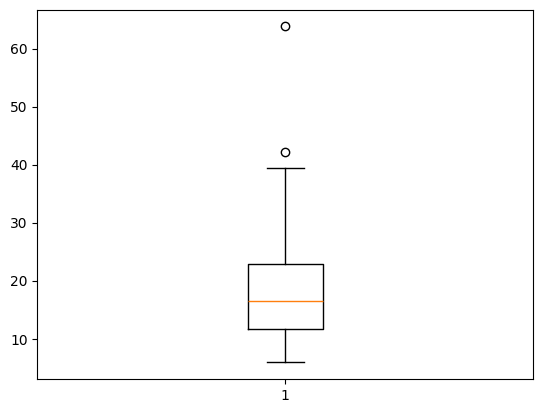

In [0]:
# We use boxplot to visualize outliers in Poverty ratio
plt.boxplot(df_final['Poverty_Ratio_%_Pop']);

As we can see, there are 2 outliers for `Poverty ratio` that might influence our analysis. We decide to filter them by only keeping `Poverty Ratio` over **35%**.

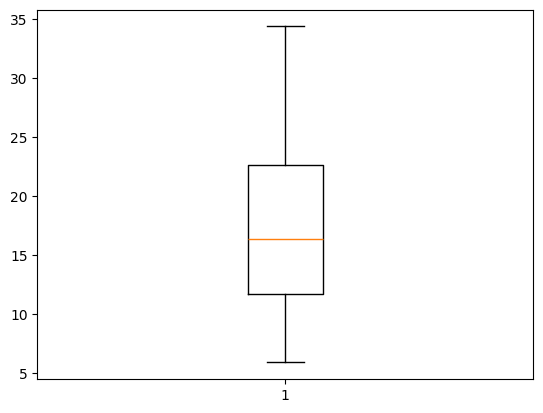

In [0]:
df_final = df_final[df_final['Poverty_Ratio_%_Pop'] < 35]
plt.boxplot(df_final['Poverty_Ratio_%_Pop']);

### Modeling  
We'll first try to use a **Linear Regression model** to modelize our data. We've already imported useful packages with **Scikit-learn** :
- _LinearRegression_ from sklearn.linear_model
- *train_test_split* from sklearn.model_selection
- *r2_score, mean_squared_error and root_mean_squared_error* from sklearn.metrics

In [0]:
# First we define our target y which is Poverty Ratio and our parameters which are the different Expenditure by % of GDP. 
y = df_final['Poverty_Ratio_%_Pop']
X = df_final.drop(['Poverty_Ratio_%_Pop'], axis=1)
# Then, we create our training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=84)

In [0]:
# We associate our multiple linear regression model and apply it to our training dataset
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

Let's do a first evaluation of our model by using R^2 score

In [0]:
# We apply R^2 score to our trained model and display the result
train_r2 = mlr.score(X_train, y_train)
print(f'training r^2: {train_r2}')

training r^2: 0.37613522800588617


We see that the result, without being totally irrelevent, is not so good, around **38%** of the target is explained by our parameters.  
Let's now compare predictions of the model with actual results and evaluate the **mean square error**.

In [0]:
# We apply our linear regression model to the training data to get predictions on the target
y_train_preds = mlr.predict(X_train)

In [0]:
# Then we evaluate the MSE by comparing predictions with real results
train_mse = mean_squared_error(y_train, y_train_preds)
print(f'training MSE: {train_mse}')
# We convert to root mean square error to get an easier understanding of the error 
test_rmse = root_mean_squared_error(y_train, y_train_preds)
print(f'testing RMSE: {test_rmse}')

training MSE: 26.093811338056355
testing RMSE: 5.108210189298827


We have an error above of **5.1 points** in our prediction of `Poverty Ratio`. It is quite bad for a value going from 0 to 35.  
We'll now check how the R^2 score behaves on test data.

In [0]:
# We apply R^2 score to our test data and display the result
test_r2 = mlr.score(X_test, y_test)
print(f'training r^2: {test_r2}')

training r^2: 0.2669972625096435


In [0]:
# We also check RMSE on the test data, to compare with train data
y_test_preds = mlr.predict(X_test)
test_rmse = root_mean_squared_error(y_test, y_test_preds)
print(f'testing RMSE: {test_rmse}')

testing RMSE: 5.76140870346469


We see that **R^2 score is down to 0.27**, meaning that our model is able to explain 27% of the target with the variables available. Accordingly, RMSE is a bit worse than it was on train data, with a value of **5.8**. Even if it is coherent with train results, we definitely need to improve our model.

### Deeper Data Understanding
We'll get back to the dtaa a try to understand a bit better the existing correlations betweeen the different parameters. To do so, we'll use a few visualizations tools such as **Correlation Matrix Heatmap** and **Scatter plots**. 

In [0]:
# We calculate the correlation matrix of the features
corr_matrix = df_final.corr()
# We print the correlation matrix sorted by linear correlation with the target Poverty Ratio
corr_matrix["Poverty_Ratio_%_Pop"].sort_values(ascending=False)

Poverty_Ratio_%_Pop     1.000000
Mil_Exp_%_GDP           0.174908
Health_Exp_%_GDP       -0.306414
R&D_Exp_%_GDP          -0.324368
Edu_Exp_%_GDP          -0.451033
Dom_Health_Exp_%_GDP   -0.526680
Name: Poverty_Ratio_%_Pop, dtype: float64

We see that only one expenditure is positively correlated to `Poverty Ratio`, `Military Expenditure`. It means that countries that spend a higher percentage of their GDP on military expenses are more enclined to have a higher `Poverty Ratio`. By the way, although correlation is positive, it is weakest one. The correlation matrix shows that the highest correlations of `Poverty Ratio` are with `Domestic Health` (**-0.53**) and `Education Expenditure` (**-0.45**). It means that countries that spend a higher part of their GDP on those two domains show a lower `Poverty Ratio`.

Let's see if we get more insights with **scatter plots** pairing the different features.

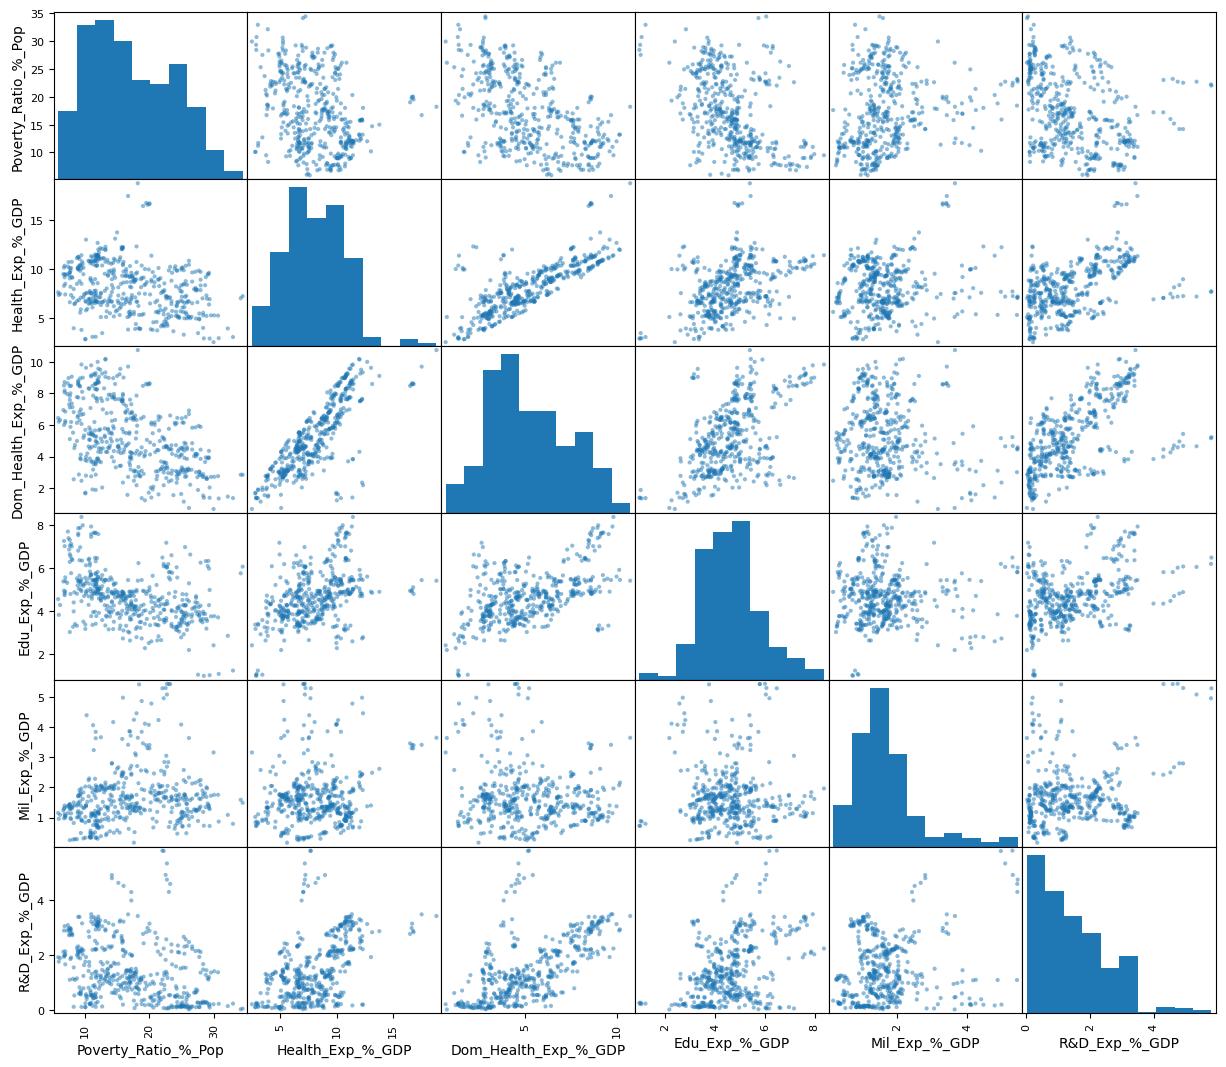

In [0]:
# Plot the most important feature pairs with a scatter plot
features = ["Poverty_Ratio_%_Pop", "Health_Exp_%_GDP", "Dom_Health_Exp_%_GDP", "Edu_Exp_%_GDP", "Mil_Exp_%_GDP", "R&D_Exp_%_GDP"]
scatter_matrix(df_final[features], figsize=(15, 13))
plt.show()

If we look at all the **scatter plots**, we immediately see that there is a strong correlation between `Domestic Health Expenditure` and `Global Health Expenditure`, which is no surprise, one being part of the other. Maybe we could ignore one of them for the next steps. We also anticipate that correlation is quite good between `Domestic Health Expenditure` and `Education Expenditure`. It confirms what we saw before about those two expenditures being the more correlated to `Poverty Ratio`, as they evolve in the same way.  
If we now focus on the `Poverty Ratio` scatter plots, we also can confirm that the best visual correlation is with `Domestic Health` (and `Global Health`) Expenditure. `Education Expenditure` shows a less obvious visual correlation.  
The **Correlation matrix heatmap** below is another way to visualize those conclusions. `Domestic Health` and `Education` being the more correlated to `Poverty Ratio`.

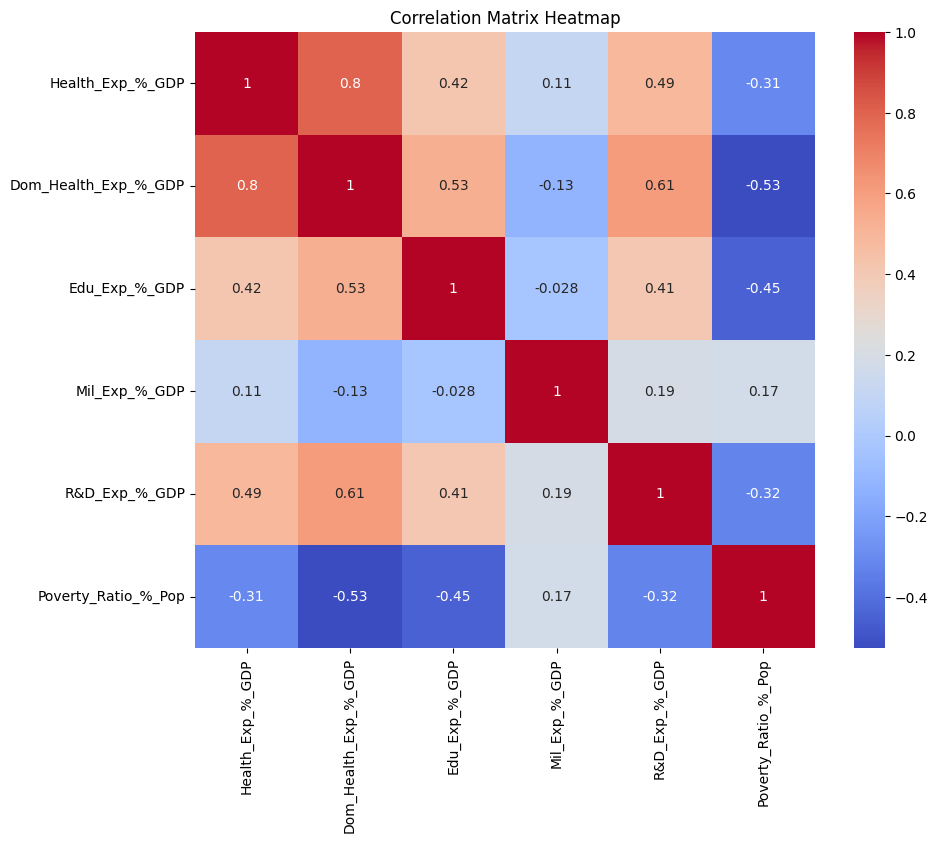

In [0]:
# We plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

With those new elements, we decide to test another model, trying to get better predictions. We'll work with a **Decision Tree Regressor**.

In [0]:
# We apply a Decision Tree Model to our train data as defined before
tree_model = DecisionTreeRegressor(random_state=0)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [0]:
# We calculate predictions for our train dataset
Y_tree_train_preds = tree_model.predict(X_train)
# We calculate the RMSE to evaluate the results
train_rmse = root_mean_squared_error(y_train, Y_tree_train_preds)
print(f'training RMSE: {train_rmse}')

training RMSE: 0.0


RMSE is null. Wether the model is perfect or it is **overfitting**. Of course, second option is more likely. Let's test the **tree model** on test dataset to answer that question.

In [0]:
# We apply our model to the test dataset
Y_tree_test_preds = tree_model.predict(X_test)
test_rmse = root_mean_squared_error(y_test, Y_tree_test_preds)
print(f'testing RMSE: {test_rmse}')

testing RMSE: 5.067695577038785


In [0]:
# We apply R^2 score to our test data and display the result
test_r2 = tree_model.score(X_test, y_test)
print(f'training r^2: {test_r2}')

training r^2: 0.43288744159910897


Sadly, our doubts are confirmed and we see that our model is not perfect. **RMSE of 5.1** shows that there was some overfitting.  
However, RMSE is better than he one got with **multi linear model** and **R^2 is better** than on the multi ninear model.

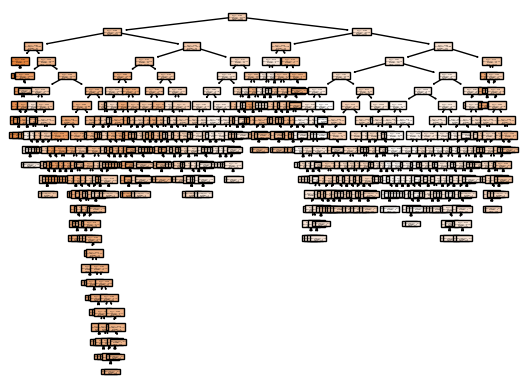

In [0]:
# Let's visualize the plot tree of our Decision Tree Regressor
plot_tree(tree_model, filled=True)
plt.show()

As we could expect, our tree has many ramifications, with long branches. This is because we didn't give any constraints to the **tree model**. That explains why results were **overfitting** on the train dataset.  
We could visualize that behaviour by plotting the fitting of a **Simple Tree Decision Model** to a dataset built only from `Domestic Health Expenditure`, which is our leading correlated feature.  

In [0]:
# We'd first have to create our train and test datasets on Domestic Health Expenditure data
X_train_dhe = X_train[['Dom_Health_Exp_%_GDP']]
X_test_dhe = X_test[['Dom_Health_Exp_%_GDP']]
# We apply a Decision Tree Model to our new train dataset
simple_tree_model = DecisionTreeRegressor(random_state=0)
simple_tree_model.fit(X_train_dhe, y_train)

DecisionTreeRegressor(random_state=0)

/databricks/python/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/home/spark-5986a0e0-24d5-4fc8-b82b-8c/.ipykernel/2360/command-5407267957250620-1419970467:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r.-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(xs, ys, "r.-", color='red', linewidth=2, label='model predictions')


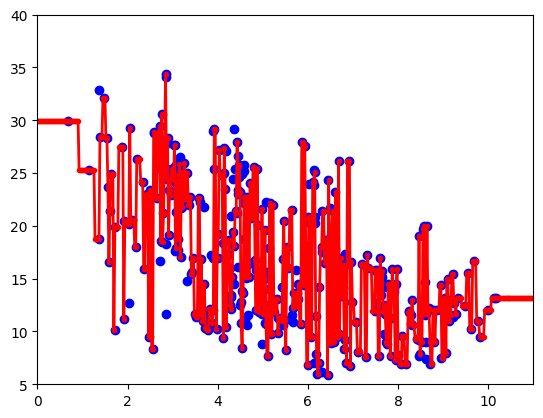

In [0]:
# We create a scatter plot of the Domestic Health Expenditure with Poverty Ratio
plt.scatter(X_train_dhe, y_train, color='blue', label='measurements')
axes = [0,11,5,40]
xs = np.linspace(axes[0], axes[1], 500).reshape(-1,1)
ys = simple_tree_model.predict(xs)
plt.axis(axes)
# We overplot the predictions
plt.plot(xs, ys, "r.-", color='red', linewidth=2, label='model predictions')
plt.show()

We clearly see that our model, reduced to one parameter, is **overfitting**. To fix that, and hopefully improve our model, we'll give some constraints to our **Decision Tree Model**.

In [0]:
# We'll give depth constraints to our Decision Tree Model to regularize it
reg_tree_model = DecisionTreeRegressor(random_state=0, max_depth=2)
reg_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

In [0]:
# We calculate predictions for our train dataset
Y_regtree_train_preds = reg_tree_model.predict(X_train)
# We calculate the RMSE to evaluate the results on train dataset
rmse_train = root_mean_squared_error(y_train, Y_regtree_train_preds)
print(f'training RMSE: {train_rmse}')
# We calculate predictions for our test dataset
Y_regtree_test_preds = reg_tree_model.predict(X_test)
# We calculate the RMSE to evaluate the results on test dataset
rmse_test = root_mean_squared_error(y_test, Y_regtree_test_preds)
print(f'testing RMSE: {test_rmse}')
# We apply R^2 score to our test data and display the result
test_r2 = reg_tree_model.score(X_test, y_test)
print(f'training r^2: {test_r2}')

training RMSE: 0.0
testing RMSE: 5.067695577038785
training r^2: 0.12655149775235308


In [0]:
# Let's now try with a max depth of 11
reg_tree_model = DecisionTreeRegressor(random_state=0, max_depth=11)
reg_tree_model.fit(X_train, y_train)
# We calculate predictions for our train dataset
Y_regtree_train_preds = reg_tree_model.predict(X_train)
# We calculate the RMSE to evaluate the results on train dataset
train_rmse = root_mean_squared_error(y_train, Y_regtree_train_preds)
print(f'training RMSE: {train_rmse}')
# We calculate predictions for our test dataset
Y_regtree_test_preds = reg_tree_model.predict(X_test)
# We calculate the RMSE to evaluate the results on test dataset
test_rmse = root_mean_squared_error(y_test, Y_regtree_test_preds)
print(f'testing RMSE: {test_rmse}')
# We apply R^2 score to our test data and display the result
test_r2 = mlr.score(X_test, y_test)
print(f'training r^2: {test_r2}')

training RMSE: 0.6874786043956796
testing RMSE: 4.717414368990133
training r^2: 0.2669972625096435


As we can see above, we gave max depth constraint of **2** to the **Decision Tree Regressor**. That value has been tested among others and is the one that shows the best **coherence between train and test dataset results**. By giving a max depth of **11**, we got the best RMSE for test dataset but as it was quite far from the RMSE of train, we can't be sure that the model will generalize well on other datasets. 

To ensure there are no outlier responsible for bad aproximation of our model, we check every feature for outliers and we remove them.

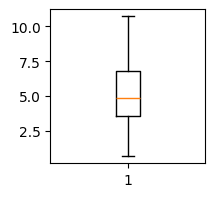

In [0]:
# We use boxplot to visualize outliers in every feature
# Domestic Health Expenditure
plt.figure(figsize=(2,2)); 
plt.boxplot(df_final['Dom_Health_Exp_%_GDP']);

No outliers identified. We keep on with other features.

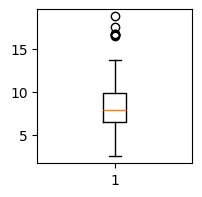

In [0]:
# Health Expenditure
plt.figure(figsize=(2,2)); 
plt.boxplot(df_final['Health_Exp_%_GDP']);

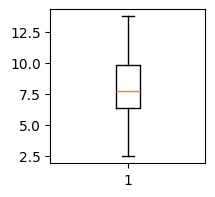

In [0]:
# We remove the identified outliers
df_final = df_final[df_final['Health_Exp_%_GDP'] < 14]
plt.figure(figsize=(2,2));
plt.boxplot(df_final['Health_Exp_%_GDP']);

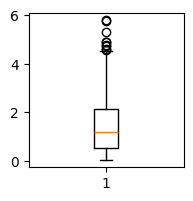

In [0]:
# R&D Expenditure
plt.figure(figsize=(2,2));
plt.boxplot(df_final['R&D_Exp_%_GDP']);

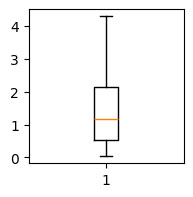

In [0]:
# We remove identified outliers
df_final = df_final[df_final['R&D_Exp_%_GDP'] < 4.5]
plt.figure(figsize=(2,2));
plt.boxplot(df_final['R&D_Exp_%_GDP']);

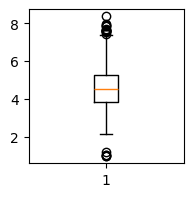

In [0]:
# Education Expenditure
plt.figure(figsize=(2,2));
plt.boxplot(df_final['Edu_Exp_%_GDP']);

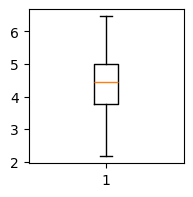

In [0]:
# We remove identified outliers
df_final = df_final[df_final['Edu_Exp_%_GDP'] < 6.5]
df_final = df_final[df_final['Edu_Exp_%_GDP'] > 2]
plt.figure(figsize=(2,2));
plt.boxplot(df_final['Edu_Exp_%_GDP']);

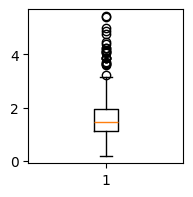

In [0]:
# Military Expenditure
plt.figure(figsize=(2,2));
plt.boxplot(df_final['Mil_Exp_%_GDP']);

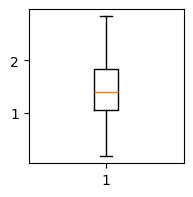

In [0]:
# We remove identified outliers
df_final = df_final[df_final['Mil_Exp_%_GDP'] < 3]
plt.figure(figsize=(2,2));
plt.boxplot(df_final['Mil_Exp_%_GDP']);

In [0]:
 # Let's check how many rows left
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 11 to 2127
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Health_Exp_%_GDP      376 non-null    float64
 1   Dom_Health_Exp_%_GDP  376 non-null    float64
 2   Edu_Exp_%_GDP         376 non-null    float64
 3   Mil_Exp_%_GDP         376 non-null    float64
 4   R&D_Exp_%_GDP         376 non-null    float64
 5   Poverty_Ratio_%_Pop   376 non-null    float64
dtypes: float64(6)
memory usage: 20.6 KB


We've reduced our dataset by almost **20%**, risking to lose precision. But let's check if we've improved the model in some way. 

In [0]:
# We calculate the correlation matrix of the features
corr_matrix = df_final.corr()
# We print the correlation matrix sorted by linear correlation with the target Poverty Ratio
corr_matrix["Poverty_Ratio_%_Pop"].sort_values(ascending=False)

Poverty_Ratio_%_Pop     1.000000
Mil_Exp_%_GDP           0.241617
Health_Exp_%_GDP       -0.269912
R&D_Exp_%_GDP          -0.347457
Edu_Exp_%_GDP          -0.375673
Dom_Health_Exp_%_GDP   -0.476436
Name: Poverty_Ratio_%_Pop, dtype: float64

First conclusion is that correlation with features is more homogenous, from **0.24 to 0.48** where before it was between **0.17 and 0.52** in absolute values. But 3 features out of 5 have lost correlation.

In [0]:
# Let's apply a multi linear model to our new dataset
y = df_final['Poverty_Ratio_%_Pop']
X = df_final.drop(['Poverty_Ratio_%_Pop'], axis=1)
# We create our training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=84)
# We associate our multiple linear regression model and apply it to our training dataset
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [0]:
# We apply our linear regression model to the training data to get predictions on the target
y_train_preds = mlr.predict(X_train)
# We convert to root mean square error to get an easier understanding of the error 
train_rmse = root_mean_squared_error(y_train, y_train_preds)
print(f'training RMSE: {train_rmse}')
# We also check RMSE on the test data, to compare with train data
y_test_preds = mlr.predict(X_test)
test_rmse = root_mean_squared_error(y_test, y_test_preds)
print(f'testing RMSE: {test_rmse}')

training RMSE: 4.977776010210716
testing RMSE: 4.41797927281689


In comparison with former dataset, multi linear model has a better RMSE on testing dataset : **4.4 against 5.8**. Progress is not tremendous but represents a **24%** improvement nonetheless.  
We can do the same job with our Tree Regressor model but last work showed that results were quite close with two models. 

In [0]:
# Let's try a Decision Tree Regressor Model with a max depth of 3
reg_tree_model = DecisionTreeRegressor(random_state=0, max_depth=3)
reg_tree_model.fit(X_train, y_train)
# We calculate predictions for our train dataset
Y_regtree_train_preds = reg_tree_model.predict(X_train)
# We calculate the RMSE to evaluate the results on train dataset
train_rmse = root_mean_squared_error(y_train, Y_regtree_train_preds)
print(f'training RMSE: {train_rmse}')
# We calculate predictions for our test dataset
Y_regtree_test_preds = reg_tree_model.predict(X_test)
# We calculate the RMSE to evaluate the results on test dataset
test_rmse = root_mean_squared_error(y_test, Y_regtree_test_preds)
print(f'testing RMSE: {test_rmse}')

training RMSE: 4.52735845930176
testing RMSE: 4.446809332928568


## CONCLUSION
For a `Poverty Ratio` between **0 and 35**, our final model shows an error of more than **10%** which is too high to be considered a reliable tool for Poverty Ratio prediction based on Governments expenditure policies. By reducing our dataset we've managed to improve our model, this can be a sign that there is no global behaviour but several "sub-behaviours", depending on regions, culture, history or other macro-economics features.    
However, we can draw some valuable insights from the study :  
- Countries spending more money on Health and Education have lower Poverty Ratio
- On the other hand, countries spending more money on military topics have a higher Poverty Ratio  
### Potential Improvements  
We've chosen to consider Poverty Ratio as a target for our study, but it is hard to know if spending more or less GDP percentage on an expenditure is causing poverty, or if poverty is causing to spend more or less on specific expenditure. An historical study on a limited number of countries with a similar environment might give some elements to answer that point.  
In our study, the fact that we used data over 10 years to multip^ly the number of rows might have introduce some bias as "outliers countries" with specific behaviours could appears up to 10 times. Maybe a study with average results over 10 years for each country would have been more significant. 
Eventually, as suggested above, grouping countries by regions with similar background (developped countries VS in developping ones, Asia VS Europe VS Africa...) might show some distinct models depending on each group. 